# Cesarian Section Classification Dataset

This works aims to predict a Cesarian based on some attributes, presented above.
The dataset, which can be found [here](http://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset), is from the UCI repository, and is a classification problem, univariate with 80 instances i.e. samples, and 5 attributes.


## Attribute Information:

1. Age: [22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38]
2. Delivery number: [1,2,3,4]
3. Delivery time: [0,1,2] -> 0 = timely , 1 = premature , 2 = latecomer
4. Blood of Pressure: [2,1,0] -> 0 = low , 1 = normal , 2 = high
5. Heart Problem: [1,0] -> 0 = apt, 1 = inept

6. Cesarian: [0,1] -> 0 = No, 1 = Yes

## Import dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

%matplotlib inline

wn.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cesarian.csv')

In [3]:
df.columns = ['Age', 'Delivery number', 'Delivery time', 'Blood of Pressure',
       'Heart Problem', 'Cesarian']
df.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Cesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


## 1. Initial Data Analysis (IDA)

Initial data analysis is the process of **data inspection** steps to be carried out after the research plan and data collection have been finished but **before formal statistical analyses** i.e. statistical hypothesis testing, etc. The purpose is to minimize the risk of incorrect or misleading results [[1]](https://www.sciencedirect.com/science/article/pii/S0022522315017948#:~:text=Initial%20data%20analysis%20is%20the,of%20incorrect%20or%20misleading%20results.).

IDA is conducted independently of the analysis needed to address the research questions and does not include analyses that touch directly the research aims, and can be divided into 3 main steps:

1. *Data cleaning* is the identification of inconsistencies in the data and the resolution of any such issues.

2. *Data screening* is the description of the data properties.

3. *Documentation and reporting* preserve the information for the later statistical analysis and models.

<img align="center" src="https://ars.els-cdn.com/content/image/1-s2.0-S0022522315017948-gr1.jpg">

This initial data analysis helps cover some issues, such as:

- Duplicate records need to be eliminated to ensure correctness of the results.

- Coding 0 or 1 may be reversed for 2 related dichotomous variables, which would produce opposite associations than expected.

- Inconsistencies in date and time stamps for sequential measurements bear the risk of errors in time variables derived later as part of the analysis.

- *Bimodal distributions* may indicate an inconsistent use of measurement units.

- *Skewed distribution* of a variable may forbid the use of statistical methods that assume a symmetric distribution.

- Ceiling and floor effects have to be taken into account in interpreting effects different from those expected.

- Statistical models may be invalid and may yield misleading results in the *presence of outliers*.

- The pattern of *missing data* at different levels (eg, for a record, a variable, or a group) may indicate a systematic error in the data collection.

- *Error rates and types* for the main variables may indicate a problem in the data collection process and can inform future studies.




**1. Quality of data:**
Several analyses can be used during the initial data analysis phase:

- Nominal and ordinal variables
    - Frequency counts (numbers and percentages)
    - Associations
        - [crosstabulations](https://www.ibm.com/support/knowledgecenter/es/SSLVMB_23.0.0/spss/base/idh_xtab.html)
        - [log linear analysis (hierarchical)](https://en.wikipedia.org/wiki/Log-linear_analysis)
    - [Exact tests](https://www.ibm.com/support/knowledgecenter/es/SSLVMB_23.0.0/spss/base/idh_exact.html) or [bootstrapping](https://www.ibm.com/support/knowledgecenter/es/SSLVMB_23.0.0/spss/bootstrapping/idh_idd_bootstrap.html) 
    - Computation of new variables


- Continuous variables
    - Distribution
        - Descriptive statistics (mean, std, variance, skewness, kurtosis)
        - [Stem-and-leaf displays](https://en.wikipedia.org/wiki/Stem-and-leaf_display)
        - Boxplots
        

**2. Quality of measurements:**
Analysis of homogeneity (reliability of measurement instrument), and inspect variances of the items and scales ([Cronbach's α](https://en.wikipedia.org/wiki/Cronbach%27s_alpha)) [[2]](https://stackoverflow.com/questions/20799403/improving-performance-of-cronbach-alpha-code-python-numpy);

**3. Initial transformations:**
Impute missing data, or to perform initial transformations of one or more predictors.





### 1.1. Data Cleaning

Here we have no control over the data, since it comes from a repository, so we must focus on inconsistencies it i.e. checking for missing values, imbalanced classes, outliers, distributions, etc.

Firstly we check some *info()* about the dataset, which shows us that, as known, we have only integers. And check out for missing values, which is none.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                80 non-null     int64
 1   Delivery number    80 non-null     int64
 2   Delivery time      80 non-null     int64
 3   Blood of Pressure  80 non-null     int64
 4   Heart Problem      80 non-null     int64
 5   Cesarian           80 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB


In [5]:
df.isnull().sum()

Age                  0
Delivery number      0
Delivery time        0
Blood of Pressure    0
Heart Problem        0
Cesarian             0
dtype: int64

### 1.1. Quantitative attributes

#### 1.1.1. Age

The *describe()* function presents a statistical description of the dataset. As we know, most predictores are qualitative nominal, so let's focus on "Age", our only continuous predictor:

- ranging from 17 up to 40 years (diff. 23 years), with majority between 25 and 27 years
- the distribution is symmetric (mean ~ median, with skewness close to zero (0.04 i.e. slightly right skewed), as well as kurtosis (-0.3 i.e. slightly flat));

So we don't have to worry about this predictor.

In [6]:
df.describe()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Cesarian
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.637500,1.000000,0.375000,0.575000
std,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


In [7]:
print('Age skew = %s and kurtosis = %s' % (df['Age'].skew(), df['Age'].kurtosis()))

Age skew = 0.04010505486995048 and kurtosis = -0.29365010718779105


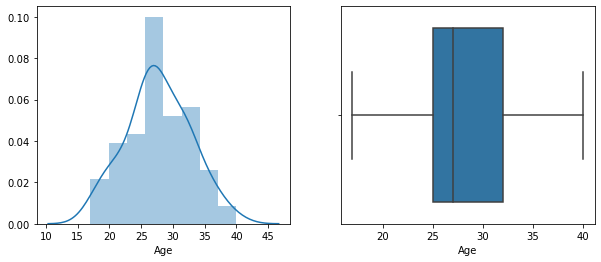

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
sns.distplot(df['Age'], ax=ax1) # KDE symmetric 
sns.boxplot(df['Age'], ax=ax2);

### 1.2. Qualitative attributes

Most attributes are qualitative, so we must check for incosistencies individually.
The attributes are:
- Delivery number
- Delivery time
- Blood of Pressure
- Heart Problem
- Cesarian

#### 1.2.1. Delivery number

"Delivery number" has 4 possible values.

Let's start with a frequency count ot check for imbalancing. As we can see, we have an imbalance here, since *Class 4* has low frequency count, whereas *Class 1* accounts for 50% of occurrences (one could say 8:1 ratio). There are some techniques ([[4]](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/), [[5]](https://machinelearningmastery.com/what-is-imbalanced-classification/), [[6]](https://sites.icmc.usp.br/gbatista/files/sigkdd2004.pdf)) that can be applied to this imbalance, such as SMOTE [[7]](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/), [[8]](https://machinelearningmastery.com/multi-class-imbalanced-classification/), which may be further discussed if we have to apply it. for now, let's proceed.

In [9]:
df['Delivery number'].unique()

array([1, 2, 3, 4])

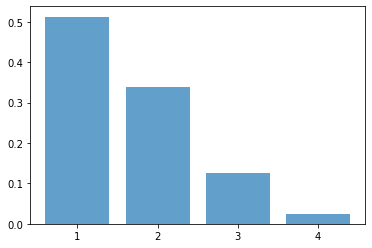

In [10]:
plt.bar(df['Delivery number'].unique(), 
       df['Delivery number'].value_counts()/df['Delivery number'].count(), alpha=.7)
plt.xticks(df['Delivery number'].unique());

#### 1.2.2. Delivery time

"Delivery time" has 3 possible values. 

Let's begin by checking the frequency count, which shows us that *Class 0* has frequency of almost 60%, whereas *Classes 1 and 2* have a frequency of almost 20%. This class is not imbalanced, so we have *no issue* here.

In [11]:
df['Delivery time'].unique()

array([0, 1, 2])

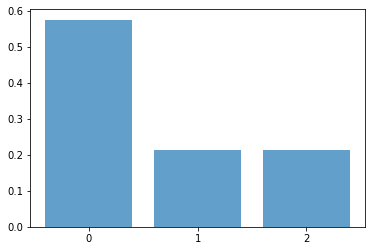

In [12]:
plt.bar(df['Delivery time'].unique(), 
       df['Delivery time'].value_counts()/df['Delivery time'].count(), alpha=.7)
plt.xticks(df['Delivery time'].unique());

#### 1.2.3. Blood of Pressure

"Blood of Pressure" has 3 possible values.

With the bar chart applied to see the frequency counts, we see that, similar to the prior attribute, this class has no issues with imbalance (ratios of 1:1:2 for *Classes 0, 1, and 2*, respectively).

In [13]:
df['Delivery time'].unique()

array([0, 1, 2])

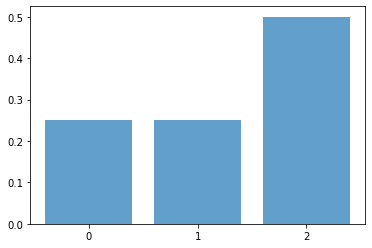

In [14]:
plt.bar(df['Blood of Pressure'].unique(), 
       df['Blood of Pressure'].value_counts()/df['Blood of Pressure'].count(), alpha=.7)
plt.xticks(df['Blood of Pressure'].unique());

#### 1.2.4. Heart Problem

"Heart Problem" has 2 possible values (binary predictor).

As the prior attribute, this predictor has no issues as well. Here, the ratio is 2:1 for *Class 0 and 1*, respectively.

In [15]:
df['Heart Problem'].unique()

array([0, 1])

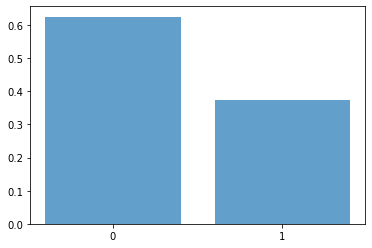

In [16]:
plt.bar(df['Heart Problem'].unique(), 
       df['Heart Problem'].value_counts()/df['Heart Problem'].count(), alpha=.7)
plt.xticks(df['Heart Problem'].unique());

#### 1.3.5. Cesarian

"Cesarian" has 2 possible values (also binary), and is the target for our model.

Here, as before, the predictor has no issues with imbalance. The ratio is approximately 3:2 for Class 0 and 1, respectively. Nevertheless, there's **more women that made a Cesarian than women that didn't.**

In [17]:
df['Cesarian'].unique()

array([0, 1])

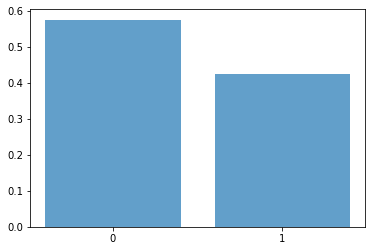

In [18]:
plt.bar(df['Cesarian'].unique(),
       df['Cesarian'].value_counts()/df['Cesarian'].count(), alpha=.7)
plt.xticks(df['Cesarian'].unique());

## 3. Exploratory Data Analysis (EDA)

**Exploratory Data Analysis** aims to summarize the main characteristics of the dataset, usually by applying visual methos [[3]](https://en.wikipedia.org/wiki/Exploratory_data_analysis). 

The objectives of EDA are:

1. Suggest hypotheses about the causes of observed phenomena
2. Assess assumptions on which statistical inference will be based
3. Support the selection of appropriate statistical tools and techniques
4. Provide a basis for further data collection through surveys or experiments

So here, after checking the variables individually, we'll look for correlations between them, and specially between the predictors and the target, to get some more insights.

As we can check with the correlation heatmap below, the predictors with the highest correlation with the target are "Heart Problem", "Delivery Time", and "Delivery number", and correlation between the predictors themselves is low.

Here is important to comment that **correlation doesn't imply causation!** which means that even though some attributes are correlated, one can't deduce a *cause-and-effect relationship* between two variables solely on the basis of an observed association.

So let's check the variables in deep.

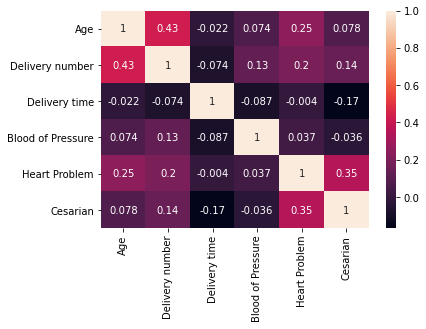

In [19]:
sns.heatmap(df.corr(), annot=True);

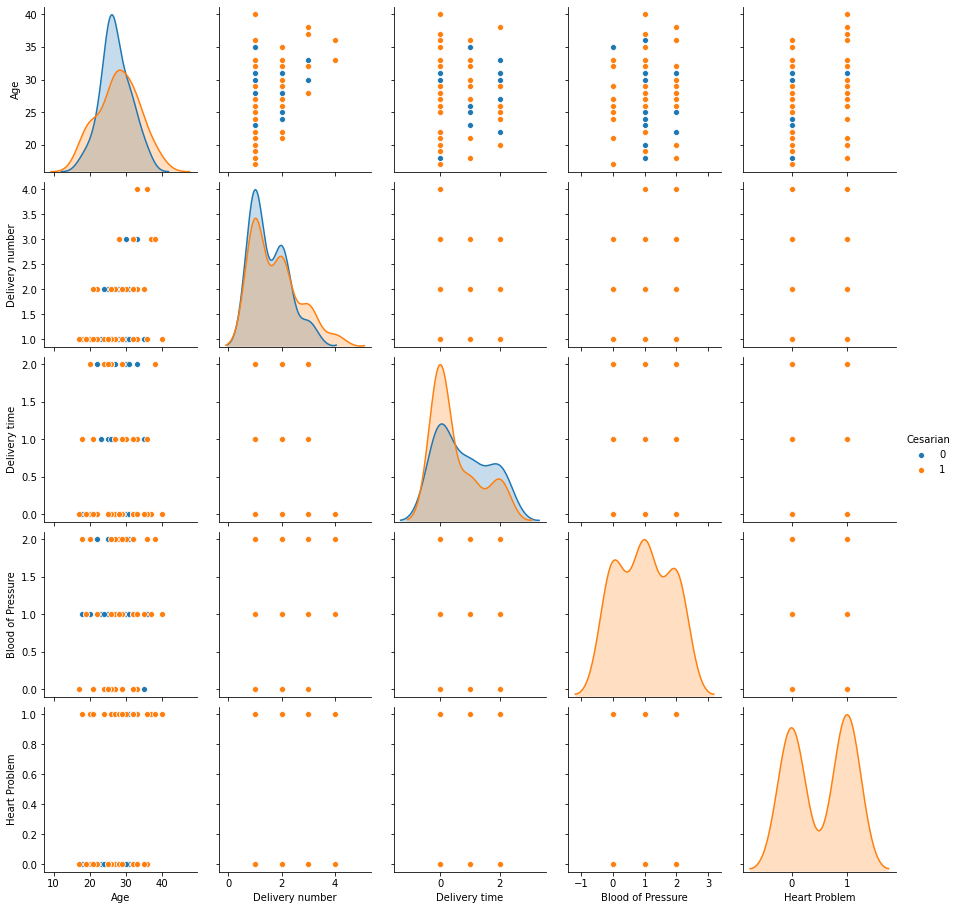

In [20]:
sns.pairplot(df, hue='Cesarian');

### 3.1. Age

Comparing Age, Cesarian, and Delivery number:
- Delivery number of 1 the Cesarian is mixed i.e. more or less half for each
- Delivery number of 2 is more common for older people to make a Cesarian, trend that follows as Delivery number increases.

This means that, as the Age increases and the Delivery number increases, so increases the possibility of Cesarian.

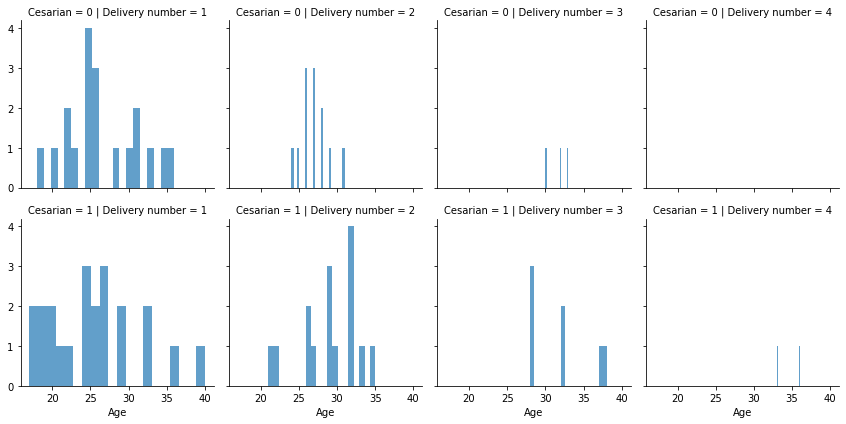

In [21]:
sns.FacetGrid(df, row='Cesarian', col='Delivery number').map(plt.hist,'Age', bins=20, alpha=.7);

Comparing Age, Cesarian, and Delivery time:
- most Delivery time = 0 (premature) made a Cesarian, with accent in older people (app. 33 yo)

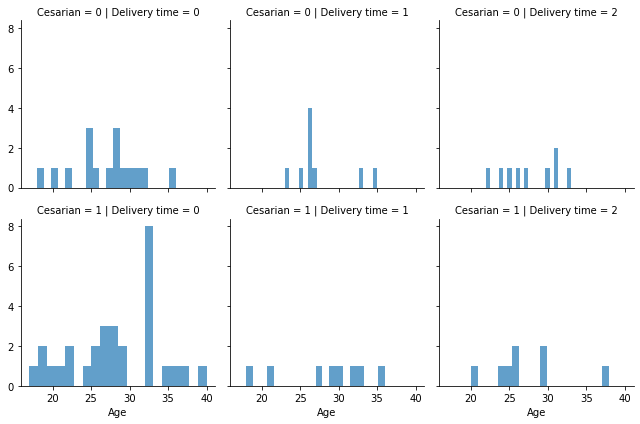

In [22]:
sns.FacetGrid(df, row='Cesarian', col='Delivery time').map(plt.hist, 'Age', bins=20, alpha=.7);

Comparing Age, Cesarian, and Heart Problem:
- Most women without a heart problem that didn't make a Cesarian, and happened more frequently with younger women (app. 25 yo)
- Most people with a heart problem did make a Cesarian, and happened more frequently with older women (app. 30 yo).

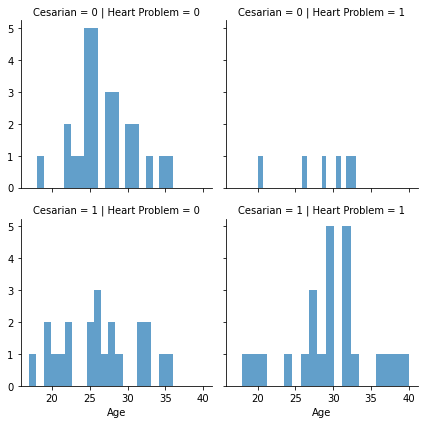

In [23]:
sns.FacetGrid(df, row='Cesarian', col='Heart Problem').map(plt.hist, 'Age', bins=20, alpha=.7);

Comparing Age, Cesarian, and Blood of Pressure:

- most women with Blood of Pressure = 1 (normal) didn't make a Cesarian, whereas for low (0) and high (0) Blood of Pressure the Cesarian procedure was more common.

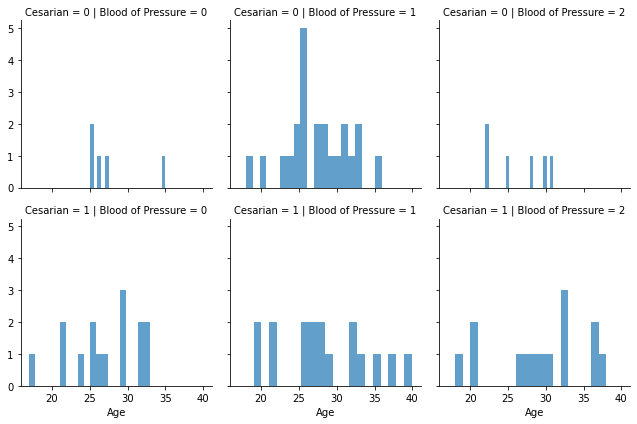

In [24]:
sns.FacetGrid(df, row='Cesarian', col='Blood of Pressure').map(plt.hist, 'Age', bins=20, alpha=.7);

### 3.2. Delivery number

Delivery number has correlation with all attirbutes, besides Delivery time. Beginnind with Blood of Pressure:

- For normal blood pressure, no cesarian is more frequent, specially for delivery time 1 and 2, whereas for delivery time 3 and 4, cesarian is more frequent;
- For low and high blood pressure, cesarian is more frequent, specially for delivery time 1 and 2

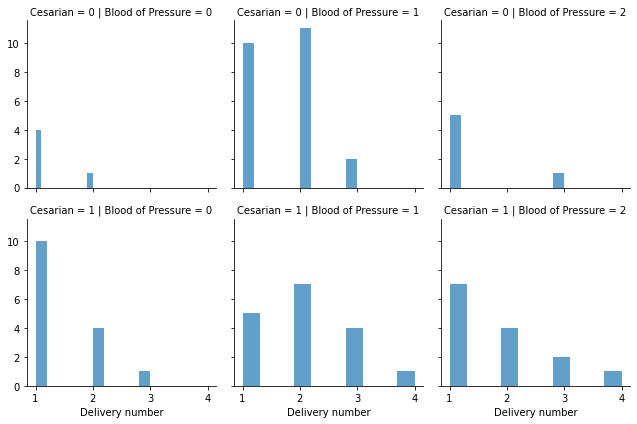

In [25]:
sns.FacetGrid(df, row='Cesarian', col='Blood of Pressure').map(plt.hist, 'Delivery number', alpha=.7);

For Heart Problem:
- Heart Problem = 1 tends to Cesarian, independent of Delivery time
- Heart Problem = 0 tends to Cesarian when Delivery time is larger

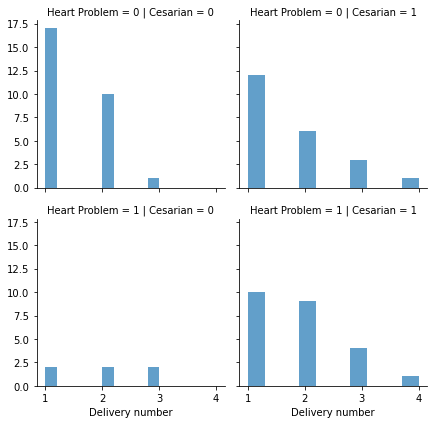

In [26]:
sns.FacetGrid(df, col='Cesarian', row='Heart Problem').map(plt.hist, 'Delivery number', alpha=.7);

### 3.3. Delivery time

Delviery time has a low correlation with all other predictors, besides the target. 
- Delivery times of 1 and 2 shows almost the same frequency for both Cesarian 0 and 1
- Delivery times of 0 the frequency of Cesarian 1 is higher

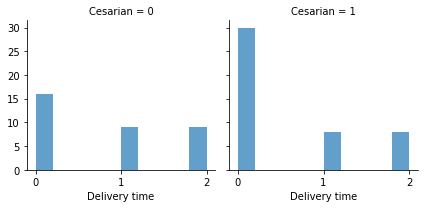

In [27]:
sns.FacetGrid(df, col='Cesarian').map(plt.hist, 'Delivery time', alpha=.7)
plt.xticks(df['Delivery time'].unique());

### 3.4. Blood of Pressure

Blood of Pressure has a correlation with Delivery number, which was already analyzed. We can again see that women with normal blood pressure tends to no cesarian, whereas low and high blood pressure tends to cesarian.

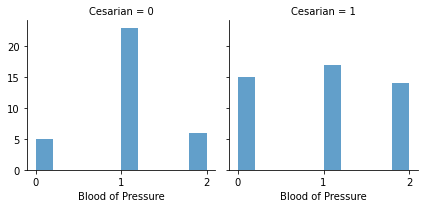

In [28]:
sns.FacetGrid(df, col='Cesarian').map(plt.hist, 'Blood of Pressure', alpha=.7)
plt.xticks(df['Blood of Pressure'].unique());

### 3.5. Heart Problem

Again, as we saw before, no heart problem = no cesarian

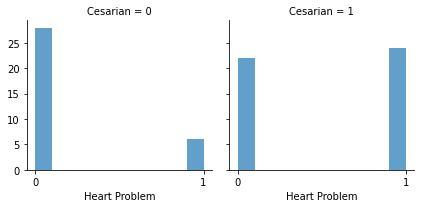

In [29]:
sns.FacetGrid(df, col='Cesarian').map(plt.hist, 'Heart Problem', alpha=.7)
plt.xticks(df['Heart Problem'].unique());

## 4. Feature Engineering

Now that we checked all predictors (the number of predictors is small, so we're able to do this here, but this is not always the case), we can try to do some feature engineering, which consists in creating new features from the ones we have.

Here we have several possibilities, so let's try two of them:

1. Feature 1(Cesarian, Blood of Pressure, Age):
    - if cesarian = 0; blood of pressure = 1; median-0.5*std <= Age <= median+0.5*std -> feature_1 = 1


2. Feature 2(Cesarian, Blood of Pressure, Delivery number):
    - if cesarian = 0; blood pressure = 1; delivery number = 1 or 2 -> feature_2 = 1


3. Feature 3(Age):
    - binned age with 4 cuts

In [30]:
df['Feature 1'] = 0  # create feature 1

age_low = df['Age'].median() - 0.5*df['Age'].std()  # compute low age range
age_high = df['Age'].median() + 0.5*df['Age'].std() # compute high age range

for i in range(0, df.shape[0]):
    if (df.iloc[i,0] >= age_low) and (df.iloc[i,0] <= age_high) and (df.iloc[i,5] == 0) \
        and (df.iloc[i,3] == 1):
         df.iloc[i,-1] = 1

In [31]:
df['Feature 2'] = 0

for i in range(0, df.shape[0]):
    if (df.iloc[i,5] == 0) and (df.iloc[i,1]) and ((df.iloc[i,1] == 1) or (df.iloc[i,1] == 2)):
        df.iloc[i,-1] = 1

In [32]:
df['Age bin'] = pd.cut(df['Age'], 4)

df['Feature 3'] = 0
df.loc[(df['Age'] <= 22.8), 'Feature 3'] = 1
df.loc[(df['Age'] > 22.8) & (df['Age'] <= 25.8), 'Feature 3'] = 2
df.loc[(df['Age'] > 25.8) & (df['Age'] <= 34.2), 'Feature 3'] = 3
df.loc[(df['Age'] > 34.2), 'Feature 3'] = 4

df = df.drop(['Age bin'], axis=1)

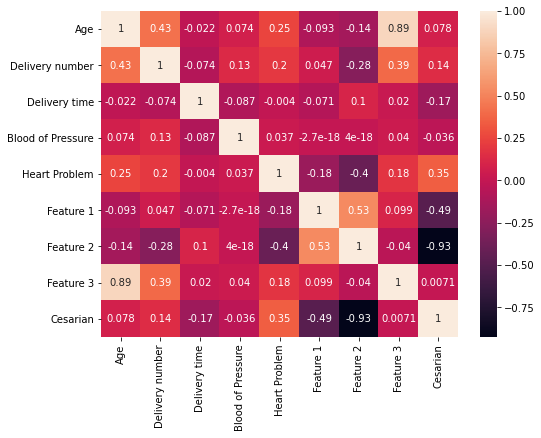

In [33]:
df = df[['Age', 'Delivery number', 'Delivery time', 'Blood of Pressure',
       'Heart Problem', 'Feature 1', 'Feature 2', 'Feature 3', 'Cesarian']]

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, ax=ax);

The heatmap shows that both Feature 1 and Feature 2 have a relatively high correlation with the target, but Feature 3 (age binning) resulted in a smalled correlation with the target, and should be disconsidered for the model.

## 6. Model

Some steps from the figure below were carried above. Now we shall screen the features for the model.

<img src="https://static.packt-cdn.com/products/9781788831307/graphics/13a6defd-b5b4-4062-aad0-cb7464630a3c.png" width="600" length="700">

This is a classification problem, with the majority of predictors being qualitative nominal data. 

Let's try some linear classifiers and tree-based classifiers. They will be:

1. [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 
2. [Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 
3. [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) 
4. [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# select predictores
X = df.drop(['Cesarian','Feature 3'], axis=1)
y = df['Cesarian']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 6.1. Linear Classifiers

In linear models, the target value is expected to be a linear combination of the features, which would be, in a mathematical notation:

$$ \hat{y}(w,x) = w_0 + w_{1}x_{1}+...+w_{p}x_{p} $$

So we have a vector $w = (w_{1},...,w_{p})$, and $w_{0}$ as the intercept [[4]](https://scikit-learn.org/stable/modules/linear_model.html).

#### 6.1.1. Logistic Regression

LR is a predective analysis algorithm based on the concept of probablity, where the cost/loss function can be defined as "sigmoid function" (also called logistic function), which transforms log-odds to prability, with the log-odds unit of measurement called **log**istic un**it** (logit). Ahead we have the sigmoid function, exemplified with two predictors $x_1, x_2$, where $l$ is the log-odds, $b$ is the base of the logarithm, and $\beta_i$ are the linear coefficients [[5]](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression): 

$$ l = log_{b}\frac{p}{1-p} = \beta_0 + \beta_1x_1 + \beta_2x_2 
\rightarrow p = \frac{1}{1+b^{-(\beta_0 + \beta_1x_1 + \beta_2x_2)}} $$

The function transforms real-value input into number (output) between [0,1] - probability, and compares with threshold, which in the example ahead is 0.5:

<img align="center" width="300" length="300" src="https://dvqlxo2m2q99q.cloudfront.net/000_clients/981864/file/9818648EisiqmG.png">

In [35]:
from sklearn.linear_model import LogisticRegression as LR

# model
lr = LR(random_state=0, solver='liblinear')

C = [.01, .1, 1, 10, 50]
penalty = ['l1','l2']

params = dict(C=C, penalty=penalty)

clf = GridSearchCV(lr, params, n_jobs=-1, cv=5).fit(X_train, y_train)

clf.best_params_

{'C': 1, 'penalty': 'l1'}

In [36]:
clf = LR(solver='liblinear', C=1, penalty='l1', random_state=0).fit(X_train, y_train)

y_predict = clf.predict(X_test)

print('Test:')
print('accuracy:',round(clf.score(X_train, y_train),2))
print('cv ROC:',round(cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean(),2))
print('cv precision:',round(cross_val_score(clf, X_train, y_train, cv=5, scoring='precision').mean(),2))

print('\nValidation:')
print('accuracy:',round(metrics.accuracy_score(y_test, y_predict),2))
print('recall:',round(metrics.recall_score(y_test, y_predict),2))
print('precision:',round(metrics.average_precision_score(y_test, y_predict),2))
print('ROC:',round(metrics.roc_auc_score(y_test, y_predict),2))

Test:
accuracy: 0.98
cv ROC: 0.97
cv precision: 0.98

Validation:
accuracy: 0.92
recall: 1.0
precision: 0.86
ROC: 0.92


#### 6.1.2. SVM

SVM works finding an hyperplane in a N-dimensional space (N = # predictors) that distinctly classifies the data points, looking for the *maximum margin* from the several possible hyperplanes. 

So given a a dataset with $n$ points in the form of $(\vec{x_1},y_1),...,(\vec{x_n},y_n)$, any hyperplance can be written as the set of points $\vec{x}$ satisfying $\vec{w}.\vec{x} - b = 0$.

Here, the loss function is called soft_margin, which is [[6]](https://en.wikipedia.org/wiki/Support_vector_machine):

$$ \left[\frac{1}{n} \sum{i=1}^{n} max(0,1 - y_i(w.x_i - b)) \right] + \gamma||w||² $$

This loss function, also called *hinge loss*, for two classes, for a Linear SVM:

<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" align="center" 
     width="300" length="300">
     
SVM can also make use of *kernels* which acts as nonlinear classifiers.

In [37]:
from sklearn.svm import SVC

# model
svm = SVC(random_state=0, max_iter=10000, kernel='linear')

C = [.01, .1, 1, 10, 20, 50]
gamma = [.01, .1, 1, 10]

params = dict(C=C, gamma=gamma)

clf = GridSearchCV(svm, params, n_jobs=-1, cv=5).fit(X_train, y_train)

clf.best_params_

{'C': 0.1, 'gamma': 0.01}

In [38]:
clf = SVC(random_state=0, max_iter=10000, kernel='linear',
         C=0.1, gamma=0.01).fit(X_train, y_train)

y_predict = clf.predict(X_test)

print('Test:')
print('accuracy:',round(clf.score(X_train, y_train),2))
print('cv ROC:',round(cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean(),2))
print('cv precision:',round(cross_val_score(clf, X_train, y_train, cv=5, scoring='precision').mean(),2))

print('\nValidation:')
print('accuracy:',round(metrics.accuracy_score(y_test, y_predict),2))
print('recall:',round(metrics.recall_score(y_test, y_predict),2))
print('precision:',round(metrics.average_precision_score(y_test, y_predict),2))
print('ROC:',round(metrics.roc_auc_score(y_test, y_predict),2))

Test:
accuracy: 0.98
cv ROC: 0.97
cv precision: 0.98

Validation:
accuracy: 0.92
recall: 1.0
precision: 0.86
ROC: 0.92


### 6.2. Tree-based Classifiers

Tree-based classifiers are tough agains outliers, and a good choice for qualitative nominal data, as our case.

These algorrithms uses decision trees to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves) [[7]](https://en.wikipedia.org/wiki/Decision_tree_learning). The trees works as series of if-else statements:

<img src="https://miro.medium.com/max/945/1*XMId5sJqPtm8-RIwVVz2tg.png" align="center" 
     width="300" length="300">

#### 6.2.1. Random Forest

Random Forests is an ensemble of Decision Trees with Bootstrap Aggregation (bagging) where trees run in parallel, meaning no interaction between them. Here's a diagram:

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png"
     align="center" length="400" width="400">
     
The bootstrap is a random sampling with replacement in order to better understand bias and variance, and fits trees to these samples. So for a given set $X = x_1,...,x_n$ with target $Y = y_1,...,y_n$, bagging repeatedly (B times) selects the random samples with replacement and fit the trees. So the algorithm is [[8]](https://en.wikipedia.org/wiki/Random_forest):

- for b = 1,...,B
    1. Sample, with replacement, n training samples Xb,Yb from X,Y
    2. train the classifier fb on Xb,Yb
    
After training it averages all predictions:

$$ \hat{f} = \frac{1}{B} \sum_{b=1}^{B} f_b(x) $$

Bootstrap increases model performance since it can reduce variace while maintain bias, which means that we can add trees to the model withou overfitting.

In [39]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC(random_state=0, n_jobs=-1, max_features='sqrt')

n_estimators = [2, 5, 10, 20, 50, 80, 100, 120]
max_depth = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

params = dict(n_estimators=n_estimators, max_depth=max_depth)

clf = GridSearchCV(rfc, params, n_jobs=-1, cv=5).fit(X_train, y_train)

clf.best_params_

{'max_depth': 2, 'n_estimators': 5}

In [40]:
clf = RFC(random_state=0, n_jobs=-1, max_features='sqrt',
                            max_depth=2, n_estimators=5).fit(X_train, y_train)
                             
y_predict = clf.predict(X_test)

print('Test:')
print('accuracy:',round(clf.score(X_train, y_train),2))
print('cv ROC:',round(cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean(),2))
print('cv precision:',round(cross_val_score(clf, X_train, y_train, cv=5, scoring='precision').mean(),2))

print('\nValidation:')
print('accuracy:',round(metrics.accuracy_score(y_test, y_predict),2))
print('recall:',round(metrics.recall_score(y_test, y_predict),2))
print('precision:',round(metrics.average_precision_score(y_test, y_predict),2))
print('ROC:',round(metrics.roc_auc_score(y_test, y_predict),2))

Test:
accuracy: 0.98
cv ROC: 0.97
cv precision: 0.98

Validation:
accuracy: 0.92
recall: 1.0
precision: 0.86
ROC: 0.92


#### 6.2.2. Gradient Boosting

Gradient boosting uses an ensemble of individual trees (weak learners) in series to achieve a strong learner. Here, the trees are connected in series so the next focus on fixing the errors of the previous (acts like a feedback). A large number of trees, in this case, can lead to overfitting, but if tuned right, it can be more accurate thatn Random Forests [[9]](https://en.wikipedia.org/wiki/Gradient_boosting#:~:text=Gradient%20boosting%20is%20a%20machine,prediction%20models%2C%20typically%20decision%20trees.). Here's the diagram:

<img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_7714/datasets/Gradient_Boosting3_learning_rate.png" align="center" length="550" width="550">

The gradient boosting seeks an approximation $\hat{F}(x)$ in the form of weighted functions of $h_i$ (weak learners):

$$ \hat{F}(x)=\sum_{i=1}^{M}\gamma_ih_i(x) + const $$


The trees partition the input space into $J_m$ (number of leaves) disjoint regions $R_{1m},...,R_{J_{m}m}$ and predicts a constant value in each region. The output for a tree $h_m(x)$ can be written as functino of the predicted value $b_{jm}$ in the region $R_{jm}$:

$$ h_m(x) = \sum_{j=1}^{J_m}b_{jm}1_{R_{jm}}(x) $$

The updates hapeens with the predictions individually multiplied by $\gamma_{jm}$, chosen to minimize the loss function $L$ in the set $\{(x_1,y_1),...,(x_n,y_n)\}$:

$$ F_m(x) = F_{m-1}(x) + \sum_{j=1}^{J_m}\gamma_{jm}1_{R_{jm}}(x) $$

$$ \gamma_{jm} = arg min_\gamma \sum_{x_i \in R_{jm}} L(y_i, F_{m-1}(x_i) + \gamma) $$

In [41]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

gbc = GBC(random_state=0)

learning_rate = [.01, .1, .2, .25, .3]
n_estimators = [10, 50, 100, 120, 150]
subsample = [.5, 1, 1.5]
max_depth = [1, 3, 5, 8]
max_features = ['sqrt','log2']

params = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, 
              max_features=max_features, max_depth=max_depth)

clf = GridSearchCV(gbc, params, cv=5, n_jobs=-1).fit(X_train, y_train)

clf.best_params_

{'learning_rate': 0.01,
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 150,
 'subsample': 0.5}

In [42]:
clf = GBC(random_state=0, learning_rate=0.01, max_depth=1,
                                max_features='sqrt', n_estimators=150, subsample=0.5).fit(X_train, y_train)

y_predict = clf.predict(X_test)

print('Test:')
print('accuracy:',round(clf.score(X_train, y_train),2))
print('cv ROC:',round(cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean(),2))
print('cv precision:',round(cross_val_score(clf, X_train, y_train, cv=5, scoring='precision').mean(),2))

print('\nValidation:')
print('accuracy:',round(metrics.accuracy_score(y_test, y_predict),2))
print('recall:',round(metrics.recall_score(y_test, y_predict),2))
print('precision:',round(metrics.average_precision_score(y_test, y_predict),2))
print('ROC:',round(metrics.roc_auc_score(y_test, y_predict),2))

Test:
accuracy: 0.98
cv ROC: 0.97
cv precision: 0.98

Validation:
accuracy: 0.92
recall: 1.0
precision: 0.86
ROC: 0.92


## 7. Highlights

In this problem, we have two kinds of errors: Type I, or False Positive (FP), which can be thought as a false alarm; and Type II, or False Negative (FN), which can be thought as a miss.


As we can see from the validation, all algorithms had the same accuracy of 0.92. This metric is the ratio of true predictions over all predictions, which can be written as:

$$ accuracy = \frac{TP + TN}{TN + TP + FN + FP} $$

This is a good estimation. But depending on the problems, one should use more metrics to validate the model, such as sensitivity (also know as recall or True Positive Rate - TPR), which is:

$$ sensitivity = \frac{TP}{TP + FN}$$

This is an important metric since it considers the number of False Negatives, which in some cases must be as low as possible. For example, if one is trying to predict cancer, the number of False Negatives must be low, so the recall must be high, as in our case, which resulted in 1.

On the other hand, you've got precision, which is:

$$ precision = \frac{TP}{TP + FP} $$

Here, the metric considers the False Positives. This metric is usually used in other kinds of problems, such as document classification (relevant documents) or a searching engine ranking. In our case, it resulted in 0.86.

There's often a *trade-off* between both metrics. Another metric that implements TPR is the ROC and Area under the Curve AUC), which can be interpreted as the probability that the classifier will assign a higher score to a randomly chosen positive example than to a randomly chosen negative example. Here, we had a ROC AUC of 0.92, which is a pretty good result. Here is an example of how ROC AUC looks like:

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png" align="center" width="400" length="400">

Summarizing, even though we didn't have many samples, our model resulted in good values of sensitivity/recall and ROC AUC, being capable to predict whether if a women will make a Ceasarian with a good precision!